In [2]:
import tensorflow as tf
import keras as K
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
# Step 1: Load dataset

(x_train, _), (x_test, _) = mnist.load_data()

H = 28
W = 28
C = 1

# convert to float32, with pixel values in the range [0-1]
x_train = x_train.reshape([x_train.shape[0], H, W, C]).astype(np.float32)
x_test = x_test.reshape([x_test.shape[0], H, W, C]).astype(np.float32)

x_train = x_train/255.0
x_test = x_test/255.0

# copy data and add gaussian noise, sigma=0.2
x_train_noisy = np.copy(x_train) + np.random.normal(loc = 0, scale = 0.2, size = x_train.shape)
x_test_noisy = np.copy(x_test) + np.random.normal(loc = 0, scale = 0.2, size = x_test.shape)



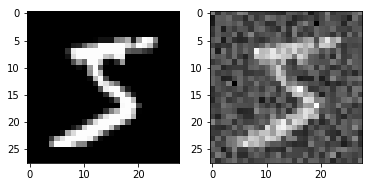

In [7]:
# visualise noiseless/noisy pair

idx = 0

plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(x_train[idx, :, :, 0], cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(x_train_noisy[idx, :, :, 0], cmap='gray')
plt.show()

In [8]:
# Step 2: Build a denoising autoencoder

model = K.models.Sequential()

# 2D conv layer
model.add(K.layers.Conv2D(input_shape = (x_train_noisy.shape[1:]), filters= 32, kernel_size = (3,3), padding='same', activation='relu'))

# 2D max pooling layer: shape is now 14x14
model.add(K.layers.MaxPooling2D(pool_size=(2, 2)))

# 2D conv layer
model.add(K.layers.Conv2D(filters= 32, kernel_size = (3,3), padding='same', activation='relu'))

# 2D max pooling layer: shape is now 7x7
model.add(K.layers.MaxPooling2D(pool_size=(2, 2)))

# 2D conv layer
model.add(K.layers.Conv2D(filters= 32, kernel_size = (3,3), padding='same', activation='relu'))

# 2D upsampling: shape is now 14x14
model.add(K.layers.UpSampling2D(size=(2, 2)))

# 2D conv layer
model.add(K.layers.Conv2D(filters= 32, kernel_size = (3,3), padding='same', activation='relu'))

# 2D upsampling: shape is now 28x28
model.add(K.layers.UpSampling2D(size=(2, 2)))

# Last convolution
model.add(K.layers.Conv2D(filters= 1, kernel_size = (3,3), padding='same', activation='sigmoid'))

# Compile the model with 'binary_crossentropy' loss function and 'Adagrad' optimizer
model.compile(optimizer='Adagrad', loss='binary_crossentropy')

In [ ]:
# Step 3: Train the model

model.fit(x_train_noisy, x_train, epochs=10, batch_size=100, shuffle=True, validation_data=(x_test_noisy, x_test))

In [ ]:
# Step 4: Evaluate the model

y_test = model.predict(x_test_noisy)
